In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
df = pd.read_csv("eurosat_model_eval_09102023.csv")
df.head()


,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,JaticVisionDatasetGenerator._func,JaticVisionDatasetGenerator.batch_size,...,load_dataset.provider,load_dataset.split,load_dataset.task,load_model._func,load_model.model_name,load_model.provider,load_model.task,adversarial_mean_categorical_accuracy,benign_mean_categorical_accuracy,perturbation_mean_linf
0,2023-09-07 17:52:50,9.7min,8e67d421ee3a46de947652d213227e7f,grandiose-lynx-117,LOCAL,model_and_parameter_evaluation/mrm8488--convne...,ubuntu,FINISHED,charmory.data.JaticVisionDatasetGenerator.__in...,128,...,huggingface,validation,image-classification,jatic_toolbox._internals.interop.api.load_model,mrm8488/convnext-tiny-finetuned-eurosat,huggingface,image-classification,0.945185,0.985185,0.020000
1,2023-09-07 17:46:05,6.8min,db92fb7fb8d441cbb604f51c7fd7d624,big-skink-852,LOCAL,model_and_parameter_evaluation/mrm8488--convne...,ubuntu,FINISHED,charmory.data.JaticVisionDatasetGenerator.__in...,128,...,huggingface,validation,image-classification,jatic_toolbox._internals.interop.api.load_model,mrm8488/convnext-tiny-finetuned-eurosat,huggingface,image-classification,0.973704,0.985185,0.020000
2,2023-09-07 17:37:56,23.7min,995a5112f1d7455da35a9929bbcd62b9,adorable-cow-816,LOCAL,model_and_parameter_evaluation/nielsr--swin-ti...,ubuntu,FINISHED,charmory.data.JaticVisionDatasetGenerator.__in...,128,...,huggingface,validation,image-classification,jatic_toolbox._internals.interop.api.load_model,nielsr/swin-tiny-patch4-window7-224-finetuned-...,huggingface,image-classification,0.805556,0.978148,0.012000
3,2023-09-07 17:28:24,17.7min,edb723a7442940fb833ce809f13e9b64,hilarious-yak-384,LOCAL,model_and_parameter_evaluation/mrm8488--convne...,ubuntu,FINISHED,charmory.data.JaticVisionDatasetGenerator.__in...,128,...,huggingface,validation,image-classification,jatic_toolbox._internals.interop.api.load_model,mrm8488/convnext-tiny-finetuned-eurosat,huggingface,image-classification,0.835556,0.985185,0.018000
4,2023-09-07 17:26:41,21.6min,ff28d01c25e144ecb2f682a6280f055c,thundering-robin-603,LOCAL,model_and_parameter_evaluation/nielsr--vit-fin...,ubuntu,FINISHED,charmory.data.JaticVisionDatasetGenerator.__in...,128,...,huggingface,validation,image-classification,jatic_toolbox._internals.interop.api.load_model,nielsr/vit-finetuned-eurosat-kornia,huggingface,image-classification,0.921481,0.966667,0.011997


In [26]:
features = ['ProjectedGradientDescent.eps', 'ProjectedGradientDescent.eps_step','ProjectedGradientDescent.max_iter']

In [27]:
x = df.loc[:, features].values
y = df.loc[:,['adversarial_mean_categorical_accuracy']].values

In [28]:
df.loc[:, 'load_model.model_name'].values

array(['mrm8488/convnext-tiny-finetuned-eurosat',
       'mrm8488/convnext-tiny-finetuned-eurosat',
       'nielsr/swin-tiny-patch4-window7-224-finetuned-eurosat',
       'mrm8488/convnext-tiny-finetuned-eurosat',
       'nielsr/vit-finetuned-eurosat-kornia',
       'nielsr/swin-tiny-patch4-window7-224-finetuned-eurosat',
       'mrm8488/convnext-tiny-finetuned-eurosat',
       'nielsr/vit-finetuned-eurosat-kornia',
       'nielsr/swin-tiny-patch4-window7-224-finetuned-eurosat',
       'mrm8488/convnext-tiny-finetuned-eurosat',
       'nielsr/vit-finetuned-eurosat-kornia',
       'mrm8488/convnext-tiny-finetuned-eurosat',
       'nielsr/swin-tiny-patch4-window7-224-finetuned-eurosat',
       'nielsr/vit-finetuned-eurosat-kornia',
       'mrm8488/convnext-tiny-finetuned-eurosat',
       'nielsr/swin-tiny-patch4-window7-224-finetuned-eurosat',
       'mrm8488/convnext-tiny-finetuned-eurosat',
       'nielsr/vit-finetuned-eurosat-kornia',
       'nielsr/swin-tiny-patch4-window7-224-finetu

In [29]:
x = StandardScaler().fit_transform(x)

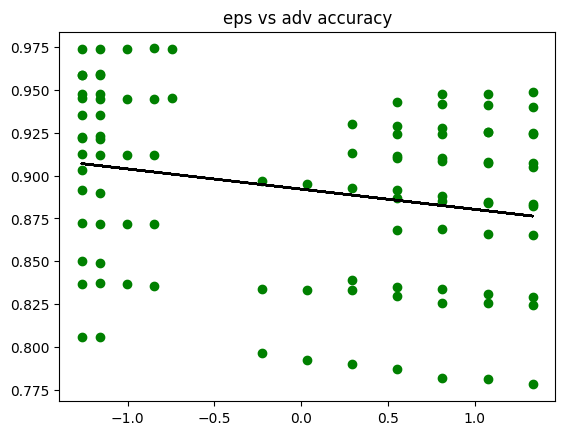

In [30]:
model2 = LinearRegression()
model2.fit(x[:,0].reshape(-1, 1), y)

plt.scatter(x[:,0].reshape(-1, 1), y.reshape(-1, 1),color='g')
plt.plot(x[:,0], model2.predict(x[:,0].reshape(-1, 1)),color='k')
plt.title('eps vs adv accuracy')
plt.show()

In [31]:

r2_score(y, model2.predict(x[:,0].reshape(-1, 1)),multioutput='variance_weighted')

0.051111365417129795

In [32]:
x[:,2]

array([-1.06133726, -1.8194353 ,  1.21295687,  1.21295687,  0.45485883,
        0.45485883,  0.45485883, -0.30323922, -0.30323922, -0.30323922,
       -1.06133726, -1.06133726, -1.06133726, -1.8194353 , -1.8194353 ,
       -1.8194353 ,  1.21295687,  1.21295687,  1.21295687,  0.45485883,
       -0.30323922,  0.45485883,  0.45485883, -1.06133726, -1.8194353 ,
       -0.30323922, -0.30323922, -1.06133726, -1.06133726,  1.21295687,
       -1.8194353 , -1.8194353 ,  0.45485883, -0.30323922, -1.06133726,
        1.21295687,  1.21295687, -1.8194353 ,  1.21295687,  1.21295687,
        1.21295687,  0.45485883,  1.21295687, -0.30323922,  1.21295687,
       -1.06133726, -1.8194353 ,  1.21295687,  1.21295687,  1.21295687,
        1.21295687,  1.21295687,  1.21295687,  1.21295687,  1.21295687,
        1.21295687,  1.21295687,  1.21295687,  1.21295687,  1.21295687,
        0.45485883,  1.21295687,  0.45485883, -0.30323922,  1.21295687,
       -0.30323922, -1.06133726, -1.06133726,  0.45485883,  0.45

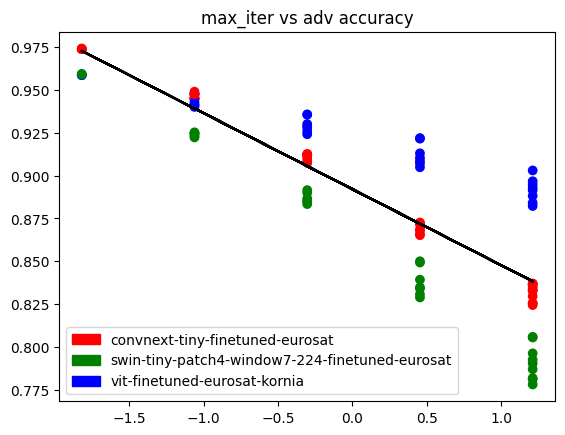

In [33]:
model1 = LinearRegression()
model1.fit(x[:,2].reshape(-1, 1), y)
colors = {'mrm8488/convnext-tiny-finetuned-eurosat':'red', 'nielsr/swin-tiny-patch4-window7-224-finetuned-eurosat':'green',
           'nielsr/vit-finetuned-eurosat-kornia':'blue'}
plt.scatter(x[:,2].reshape(-1, 1), y.reshape(-1, 1),c=df.loc[:, 'load_model.model_name'].map(colors))

plt.plot(x[:,2], model1.predict(x[:,2].reshape(-1, 1)),color='k')
plt.title('max_iter vs adv accuracy')
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='convnext-tiny-finetuned-eurosat')
green_patch = mpatches.Patch(color='green', label='swin-tiny-patch4-window7-224-finetuned-eurosat')
blue_patch = mpatches.Patch(color='blue', label='vit-finetuned-eurosat-kornia')
plt.legend(handles=[red_patch,green_patch,blue_patch])
plt.show()

In [34]:
r2_score(y, model1.predict(x[:,2].reshape(-1, 1)),multioutput='variance_weighted')

0.7254045695579221

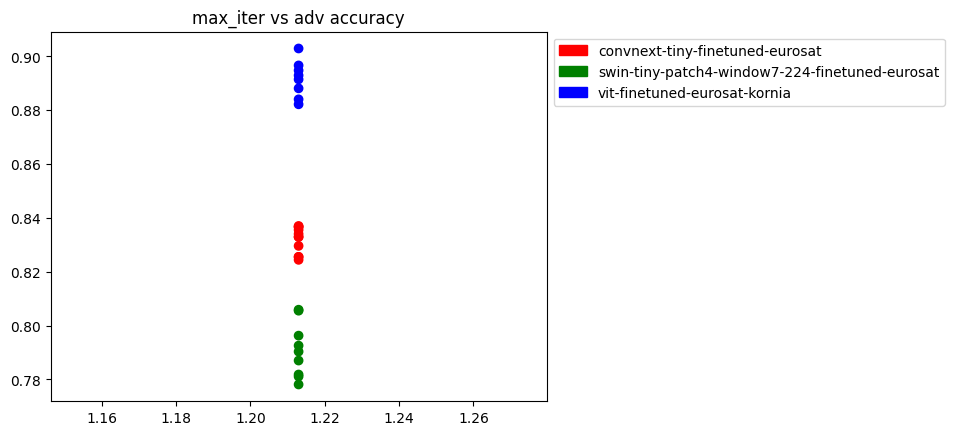

In [54]:
colors = {'mrm8488/convnext-tiny-finetuned-eurosat':'red', 'nielsr/swin-tiny-patch4-window7-224-finetuned-eurosat':'green',
           'nielsr/vit-finetuned-eurosat-kornia':'blue'}
plt.scatter(x[x[:,2] == 1.2129568697262452][:,2], y[x[:,2] == 1.2129568697262452],c=df.loc[np.where(x[:,2] == 1.2129568697262452), 'load_model.model_name'].map(colors))
plt.title('max_iter vs adv accuracy')
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='convnext-tiny-finetuned-eurosat')
green_patch = mpatches.Patch(color='green', label='swin-tiny-patch4-window7-224-finetuned-eurosat')
blue_patch = mpatches.Patch(color='blue', label='vit-finetuned-eurosat-kornia')
plt.legend(handles=[red_patch,green_patch,blue_patch], bbox_to_anchor=(1, 1))
plt.show()